In [21]:
# Recarrega os imports a cada execução
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Regressão Linear com uma Variável

## Visualização dos dados

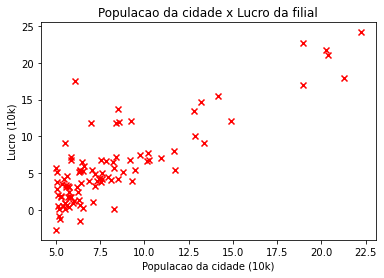

In [22]:
from codigos.plot_ex1data1 import importarDados,plot

ex1data1_path = '/data/ex1data1.txt'
ex1data1_cols = ['populacao','lucro']
X, y = importarDados(ex1data1_path,ex1data1_cols)
plot()

Através desse gráfico, podemos reparar uma clara tendência em relação ao crescimento da população da cidade com o lucro obtido.

## Gradiente Descendente

Para conseguir fazer o produto escalar das duas matrizes e calcular seu custo, precisamos antes igualar suas dimensões.

In [23]:
X.shape

(97, 1)

In [24]:
if X.shape[1] == 1:
    X = np.c_[np.ones(len(X)), X]

Antes de executar o algoritmo de gradiente descendente para otimizar os parâmetros, vamos fazer testar quanto está o custo. Para isso, precisamos antes definir o theta como uma matriz com apenas duas linhas contendo zeros.

In [25]:
theta = np.array([0,0], ndmin=2).T
theta

array([[0],
       [0]])

In [26]:
from codigos.custo_reglin_uni import custo_reglin_uni

custo_reglin_uni(X,y,theta)

32.072733877455676

Aplicando o gradiente descendente:

In [27]:
from codigos.gd_reglin_uni import gd_reglin_uni

custo, theta = gd_reglin_uni(X, y, 0.02, 1000)
print(custo)

4.478020743321126


No código acima, é chamada a função que implementa o algoritmo de gradiente descendente, nele é passado o parâmetros:
 * X - Array que contém os valores da única feature (população da cidade)
 * y - Array contendo o target (lucro)
 * alpha=0.02 - Taxa de aprendizado do algoritmo, que representa é diretamente proporcional ao passo que o algoritmo dará. Valores grandes demais podem implicar em extrapolar o ponto de mínimo, fazendo o efeito oposto ao objetivado, enquanto valores pequenos demais podem fazer o algoritmo não chegar ao mínimo.
 * epochs=1000 - Quantidade de vezes(passos) que o algoritmo executará.

### Vamos visualizar a reta projetada:

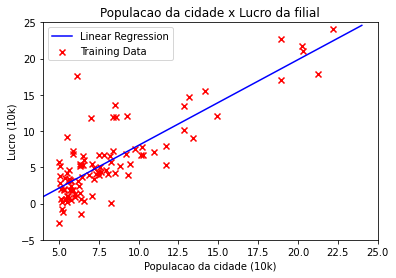

<Figure size 432x288 with 0 Axes>

In [28]:
from codigos.visualizar_reta import plot

plot(ex1data1_path, theta)

In [29]:
def predict(value, theta):
    y_predicted = theta[0] + value*theta[1]
    return y_predicted[0].round(2)

In [30]:
print(f" Para uma cidade com 35k habitantes, o lucro seria {predict(3.5, theta) * 10000}.")
print(f" Já uma cidade com 70k habitantes, o lucro seria {predict(7, theta) * 10000}.")

 Para uma cidade com 35k habitantes, o lucro seria 3500.0.
 Já uma cidade com 70k habitantes, o lucro seria 44900.0.


### Visualização dos custos para diferentes valores de theta:

D:\Documentos\Estudo\CEFET\6Periodo\Aprendizado de Maquina\T1\ml-class\ml-t1\codigos\visualizar_J_contour.py:27: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20), color='blue')


<Figure size 432x288 with 0 Axes>

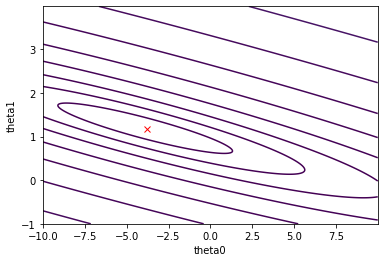

<Figure size 432x288 with 0 Axes>

In [32]:
from codigos.visualizar_J_contour import plot

J = plot(X,y,theta)

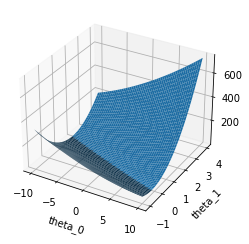

<Figure size 432x288 with 0 Axes>

In [33]:
from codigos.visualizar_J_surface import plot
plot(J)